# Bike Sharing
## Exploratory Data Analysis (EDA) and Visualization

## Introduction

Bike sharing systems are a new generation of traditional bike rentals where the process of signing up, renting and returning is automated. Through these systems, users are able to easily rent a bike from one location and return them to another. We will be analyzing bike sharing data from Washington D.C. 

We will clean, visualize, explore the bike sharing data, and answer open some intriguing questions.

In this project we will be:
* reading plaintext delimited data into `pandas`
* wrangling data for analysis
* using EDA to learn about your data 
* making informative plots


In [2]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path
import ds100_utils

# Default plot configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, Latex, Markdown

## Loading Bike Sharing Data
The data we are exploring is collected from a bike sharing system in Washington D.C.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered  

### Loading the data

In [10]:
bike = pd.read_csv(data_dir/'bikeshare.txt')
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
bike.shape

(17379, 17)

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Preliminary: Examining the Data

Before we start working with the data, let's examine its granularity.

In [8]:
bike.tail(100)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17279,17280,2012-12-27,1,1,12,20,0,4,1,1,0.24,0.2424,0.60,0.1642,12,79,91
17280,17281,2012-12-27,1,1,12,21,0,4,1,2,0.24,0.2273,0.60,0.2537,12,51,63
17281,17282,2012-12-27,1,1,12,22,0,4,1,2,0.24,0.2121,0.60,0.2836,11,33,44
17282,17283,2012-12-27,1,1,12,23,0,4,1,2,0.24,0.2273,0.60,0.2537,2,24,26
17283,17284,2012-12-28,1,1,12,0,0,5,1,2,0.24,0.2424,0.60,0.1642,3,22,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


The granularity of the data is IN BETWEEN fine and coarse grained as each row represents the total count of rent bikers in a day for each given hour. It is not single data points, but it's not completely aggregated data either. 

Some of the limitations of using this dataset is that we only have data for the year 2011 and 2012. This limit us to understand rent bike trends over a long period of time as we don't know if there was a specific phenomenum during 2011 and 2012 that could alter our results. An example of specific phenomenum would be Covid-19. For this, we could colled more data for more years, maybe from 2010-2020. Another variable that we could collect is gender and age, as this would tells us what specific population rents bikes the most.

<!-- END QUESTION -->



<!-- END QUESTION -->



<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 1: Data Preparation

A few of the variables that are numeric/integer actually encode categorical data.

We will be doing the following changes:

1. `holiday`: Converting `0` and `1` to `yes` and `no`.
1. `weekday`: Mutate the `'weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. `0` corresponds to `Sun`, `1` to `Mon` and so on.
1. `workingday`: Converting `0` and `1` to `yes` and `no`.
1. `weathersit`: Replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`. `1` corresponds to `Clear`, `2` corresponds to `Mist`, and so on in order of the previous sentence.

In [12]:
bike.replace({'holiday': {0: 'no', 1: 'yes'},
              'weekday': {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'},
              'workingday': {0: 'no', 1: 'yes'},
              'weathersit': {1: 'Clear', 2: 'Mist', 3: 'Light', 4: 'Heavy'}}, inplace=True)
bike.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
#checking how many entries in the data correspond to holidays
num_holidays = len(bike[bike['holiday'] == 'yes'])
num_holidays

500

Next we will be analyzing the daily number of registered and unregistered users by:

Constructing a data frame named `daily_counts` indexed by `dteday` with the following columns:
* `casual`: total number of casual riders for each day
* `registered`: total number of registered riders for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

In [14]:
daily_counts = bike.groupby('dteday').agg({'casual': sum, 'registered': sum, 'workingday': 'first'}) #'first' function in agg gives you the first 
                                                                                                     #encountered value. 'last' does the opposite
daily_counts.head()

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 2: Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders.

We will be using the [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) function to create a plot that overlays the distribution of the daily counts of bike users, using blue to represent `casual` riders, and green to represent `registered` riders. The temporal granularity of the records is daily counts.

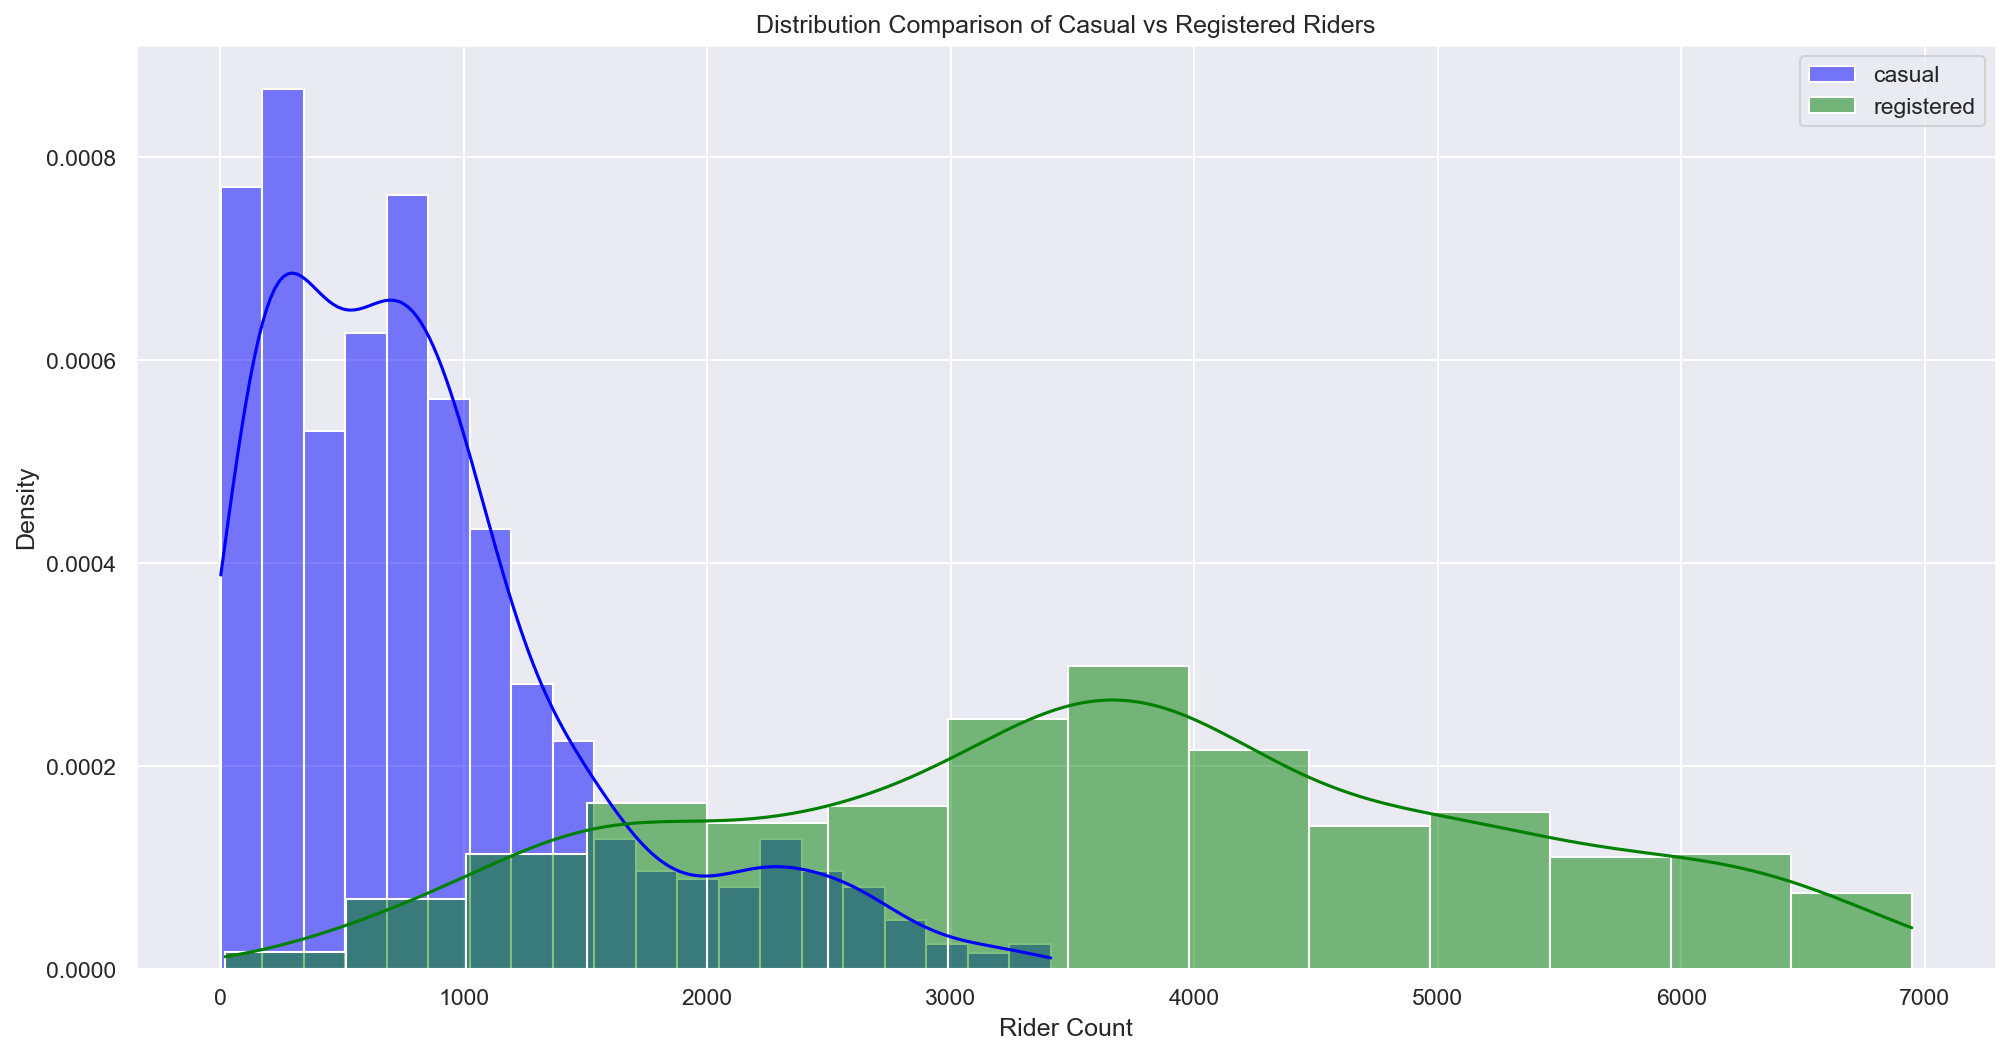

In [15]:
sns.histplot(data = daily_counts, stat = 'density', x = 'casual', color = 'blue', kde = True, label = 'casual')
sns.histplot(data = daily_counts, stat = 'density', x = 'registered', color = 'green', kde = True, label = 'registered')
plt.title("Distribution Comparison of Casual vs Registered Riders")
plt.xlabel("Rider Count")
plt.ylabel("Density")
plt.legend()



Here are some of the observations for registered vs casual riders: 

For 'registered riders' (green), we can see that it has a higher spread than 'casual riders'. It spreads from 0 to ~7000 whereas 'casual riders' (blue) has a spread from 0 to 3500, which is about half the spread of 'registered riders'. For 'registered riders' we can see that it has a symmetric distribution with no skewness, whereas casual rider's is right-skewed. The mode for registered riders is around 3800 and for casual riders it's aroud 20-30. 'Casual riders' seems to be bimodal. This graph does not present any apparent outliers or gaps._

Since the density plots do not show us how the counts for registered and casual riders vary together, I'll use `sns.lmplot` to make a scatter plot to investigate the relationship between casual and registered counts. This time, we'll use the `bike` DataFrame to plot hourly counts instead of daily counts.

The `lmplot` function draws a linear regression line by setting `fit_reg=True`. I'll also color the points in the scatterplot according to whether or not the day is a working day.

Text(0.5, 1.0, 'Comparison of Casual vs Registered Riders on Working and Non-working Days')

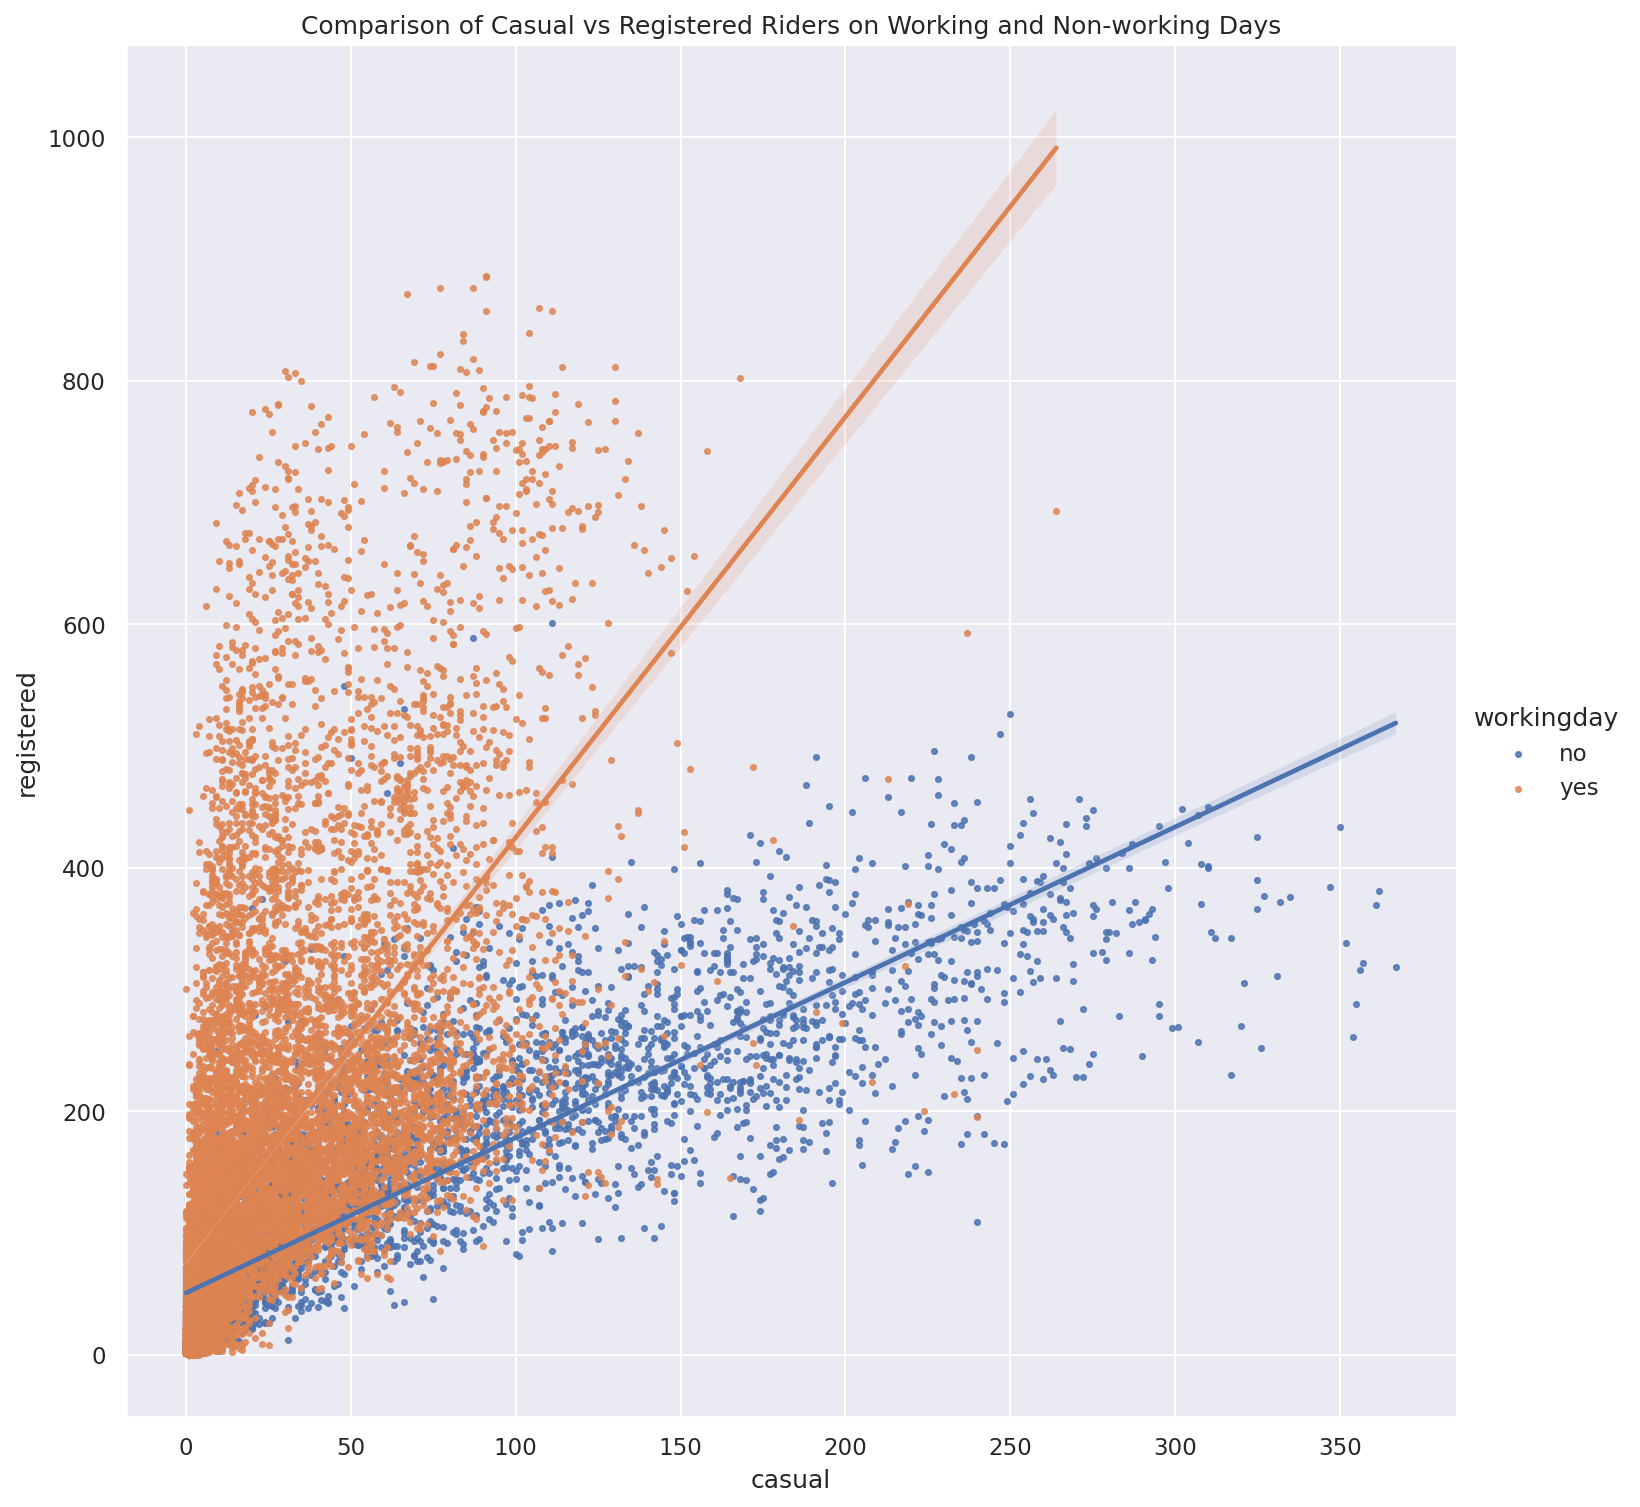

In [18]:
sns.set(font_scale=1)
sns.lmplot(data = bike, x = 'casual', y = 'registered', hue = 'workingday', fit_reg = True, height = 10, scatter_kws = {'s': 6})
plt.title("Comparison of Casual vs Registered Riders on Working and Non-working Days")

The scatterplot reveals that on working days there are more registered users renting bikes than on non-working days. Registered users also have a overall higher usage of bikes compared to casual riders. There also seems to be a linear relationship between casual and registered riders.
However, the present overplotting makes it hard to confirm a relationship between the variables.

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 3: Visualization

To address overplotting, let's try visualizing the data with another technique, the bivariate kernel density estimate.

Text(0.5, 1.0, 'KDE Plot Comparison of Registered vs Casual Riders')

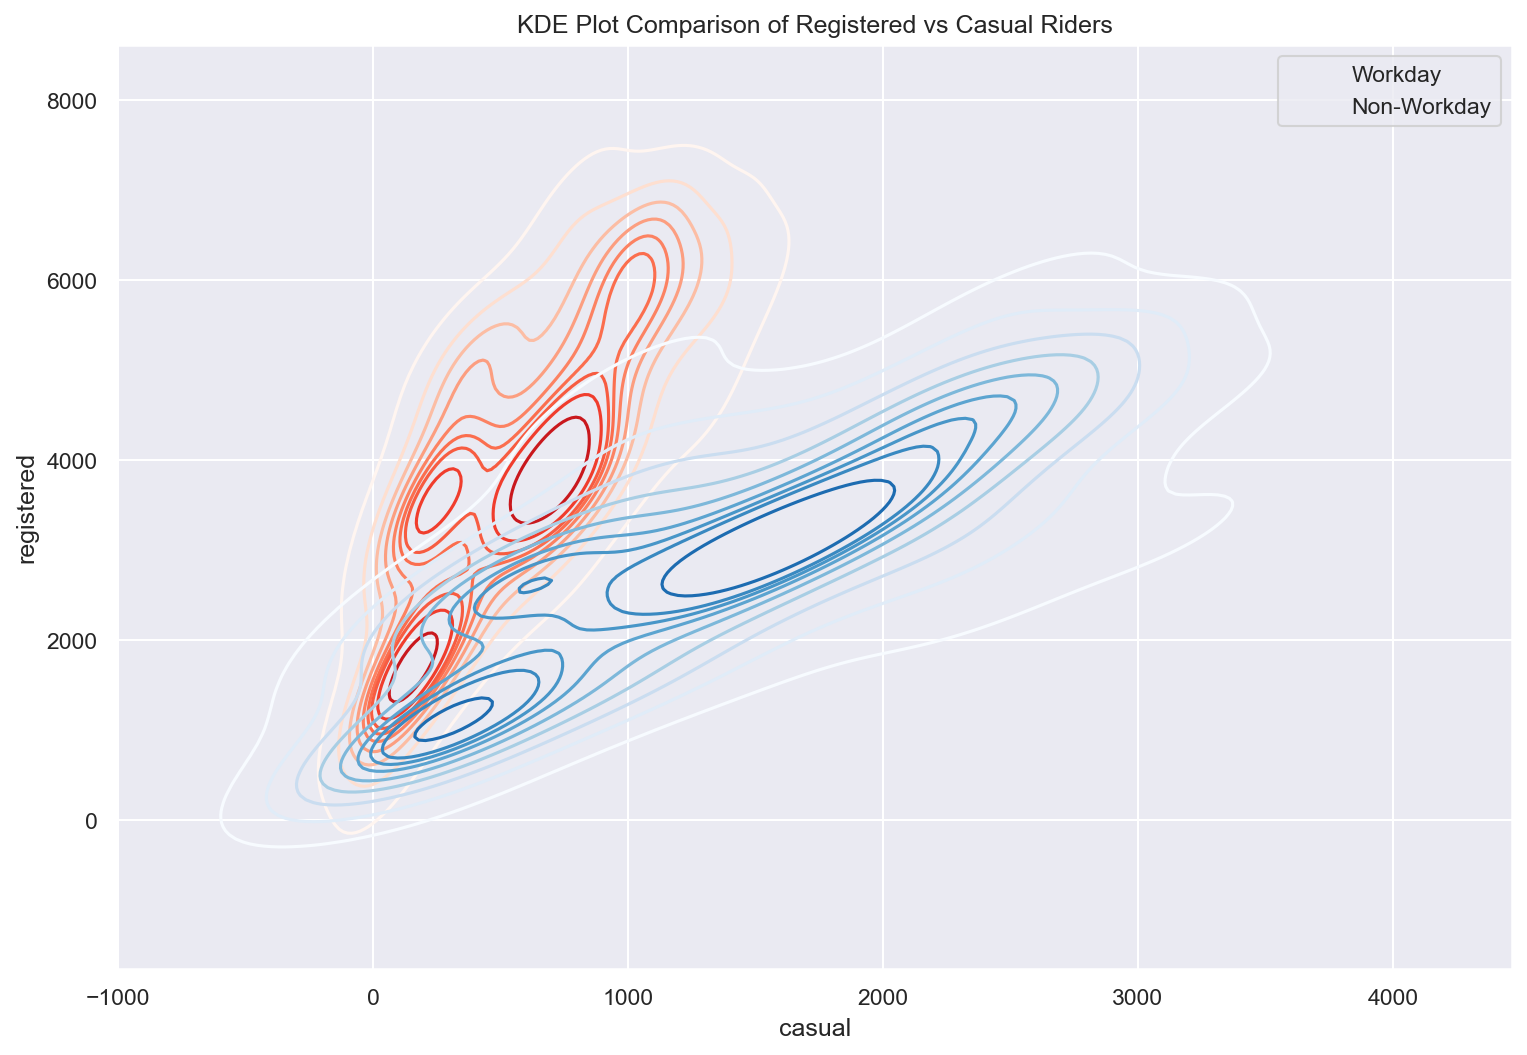

In [16]:
# Set the figure size for the plot
plt.figure(figsize=(12,8))

# Set 'is_workingday' to a boolean array that is true for all working_days
is_workingday = daily_counts.query("workingday == 'yes'")

# Bivariate KDEs require two data inputs. 
# In this case, we will need the daily counts for casual and registered riders on workdays
casual_workday = daily_counts.loc[daily_counts['workingday'] == 'yes', 'casual']
registered_workday = daily_counts.loc[daily_counts['workingday'] == 'yes', 'registered']

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for weekday rides
sns.kdeplot(x = casual_workday, y = registered_workday, cmap = "Reds", label = 'Workday')

not_workingday = daily_counts.query("workingday == 'no'")
# Repeat the same steps above but for rows corresponding to non-workingdays
casual_non_workday = daily_counts.loc[daily_counts['workingday'] == 'no', 'casual']
registered_non_workday = daily_counts.loc[daily_counts['workingday'] == 'no', 'registered']

# Use sns.kdeplot on the two variables above to plot the bivariate KDE for non-workingday rides
sns.kdeplot(x = casual_non_workday, y = registered_non_workday, cmap = "Blues", label = "Non-Workday")
plt.legend()
plt.title('KDE Plot Comparison of Registered vs Casual Riders')

Here, the lines and its color shade represent how any points are around that area. The darker the color shade is, the higher the concentration of points. The lighter the color shade is, the less points are in that area. In comparison to the `sns.lmplot` above, here we can see where there is overlap between the orange and blue since the kde is transparent.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 4: Joint Plot

As an alternative approach to visualizing the data, I'll construct the three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual riders plotted together, and the two "margin" plots (at the top and right of the figure) provide the univariate kernel density estimate of each of these variables.

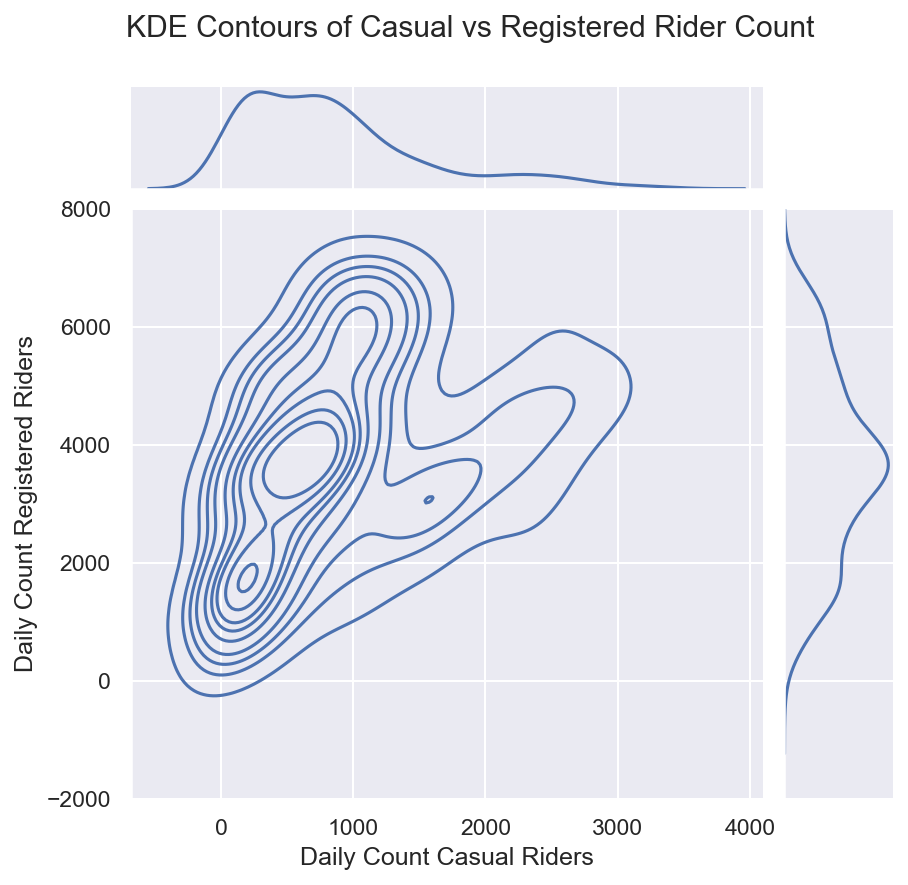

In [17]:
sns.jointplot(x=daily_counts['casual'], y=daily_counts['registered'], kind = 'kde').set_axis_labels('Daily Count Casual Riders', 'Daily Count Registered Riders')
plt.ylim(-2000, 8000)
plt.suptitle("KDE Contours of Casual vs Registered Rider Count")
plt.subplots_adjust(top=0.9);

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 5: Understanding Daily Patterns

Now, let's examine the behavior of riders by plotting the average number of riders for each hour of the day over the **entire dataset**, stratified by rider type.  

Text(0.5, 1.0, 'Average Count of Casual vs Registered by Hour')

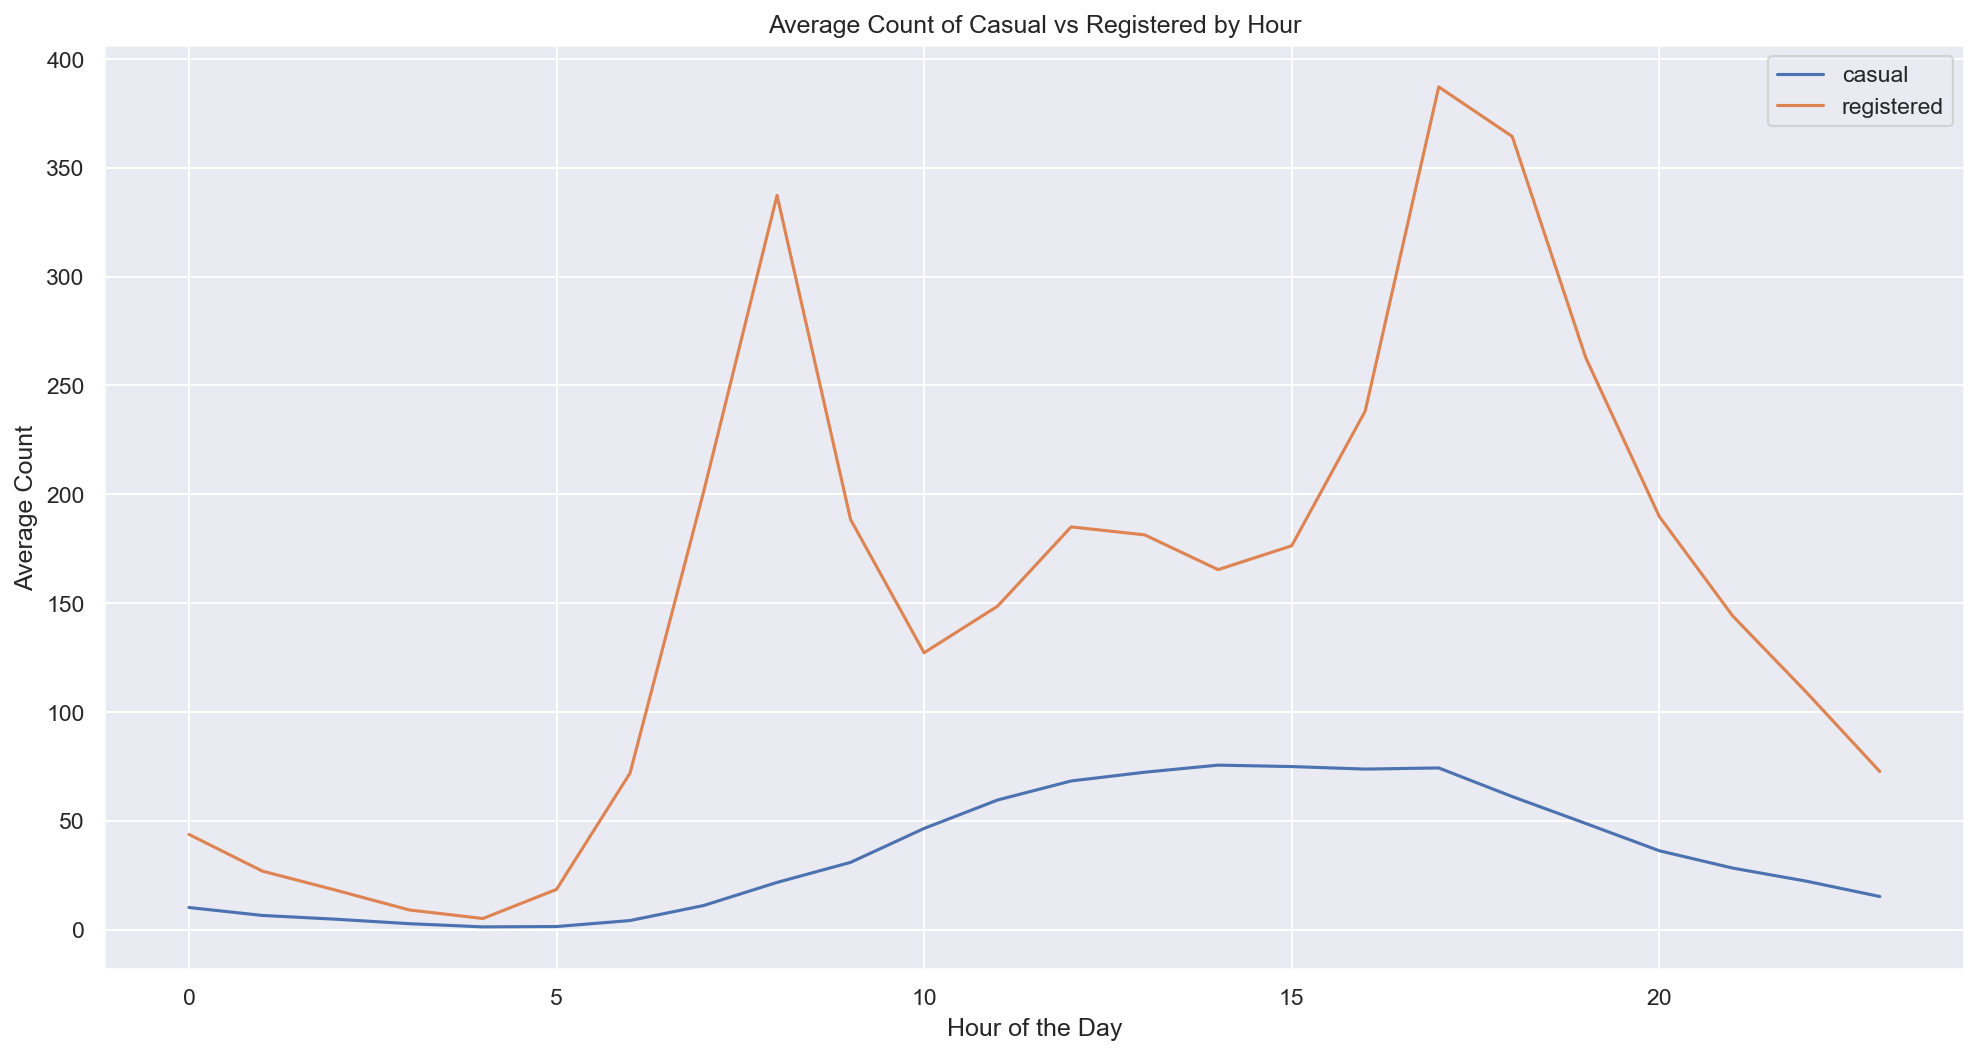

In [18]:
hours_df = bike.groupby('hr').agg({'casual': np.mean, 'registered': np.mean})

sns.lineplot(data = hours_df, x = 'hr', y = 'casual', label = "casual")
sns.lineplot(data = hours_df, x = 'hr', y = 'registered', label = "registered")
plt.ylabel("Average Count")
plt.xlabel("Hour of the Day")
plt.title("Average Count of Casual vs Registered by Hour")

The registered riders' distribution show two peaks, one around 7-9am, which is when most people commute to their jobs/school, and 4-6pm, which is when people commute back home. People who are registered probably have a bike subscription because this is their main method of commute everyday. We also see a small peak around noon at 12, and this is probably because people use the bike to go get lunch. We don't see these peaks in casual riders since the time in which they rent bikes varies. However, the distribution for casual riders is generally higher during the day than during the night, which is expected.

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 6: Exploring Ride Sharing and Weather
Now, let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

I'll create a new column `prop_casual` in the `bike` DataFrame representing the proportion of casual riders out of all riders for each record.

In [19]:
bike['prop_casual'] = bike['casual'] / bike['cnt']
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prop_casual
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1,0.000000


In order to examine the relationship between proportion of casual riders and temperature, we can create a scatterplot using [`sns.scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). We can even use color/hue to encode the information about day of week.

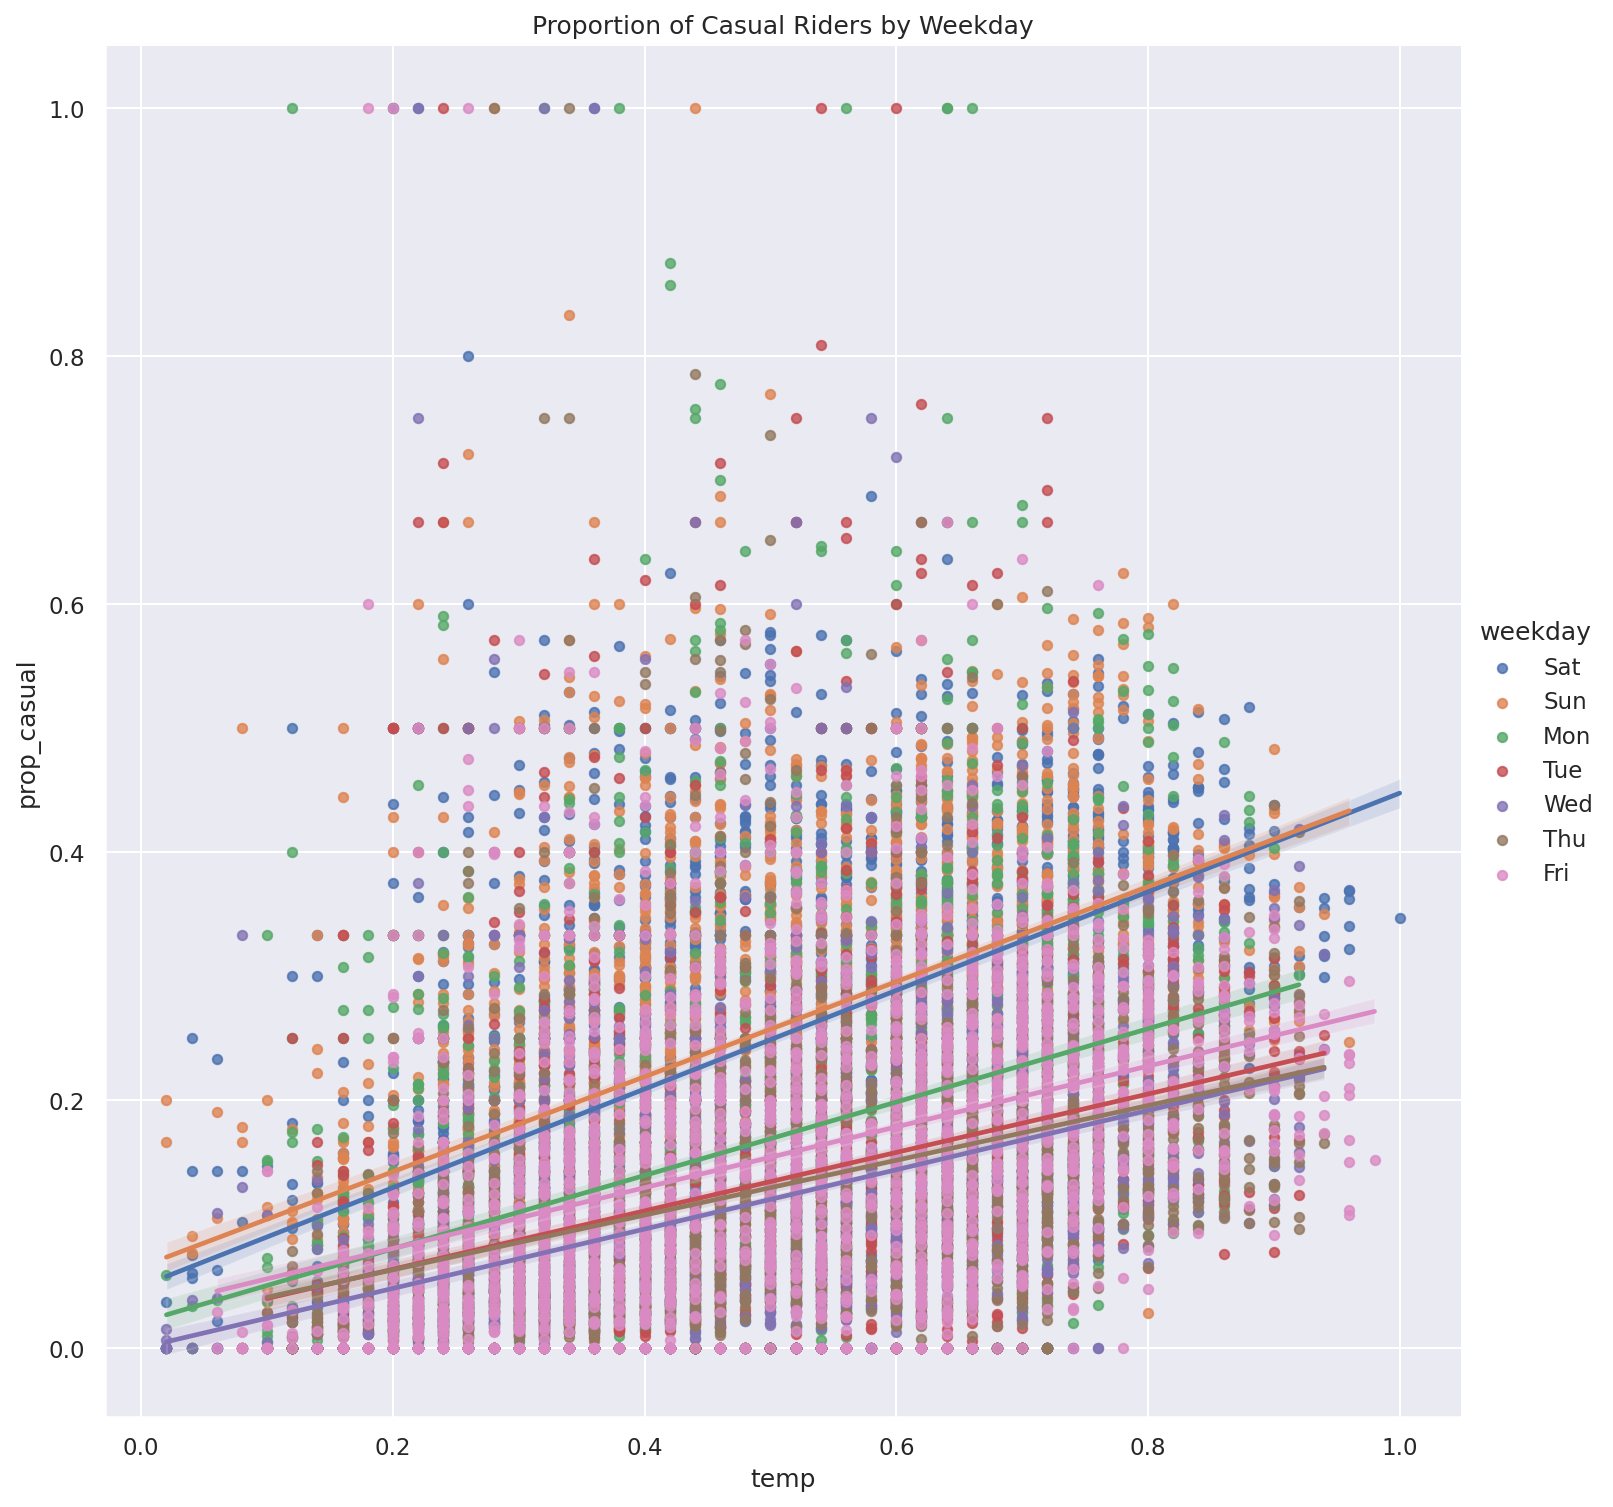

In [29]:
sns.lmplot(data=bike, x="temp", y="prop_casual", hue="weekday", scatter_kws={"s": 20}, height=10)
plt.title("Proportion of Casual Riders by Weekday");

I attempted to use linear regression using `sns.lmplot` to help distinguish the relationship between temperature and prop_casual, but the plot is fairly unconvincing. A better approach is to use local smoothing. The basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. The curve shown is a smoothed version of the scatterplot.

In our case with the bike ridership data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual riders.

<!-- BEGIN QUESTION -->

In our case with the bike ridership data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual riders.

<Figure size 1500x1200 with 0 Axes>

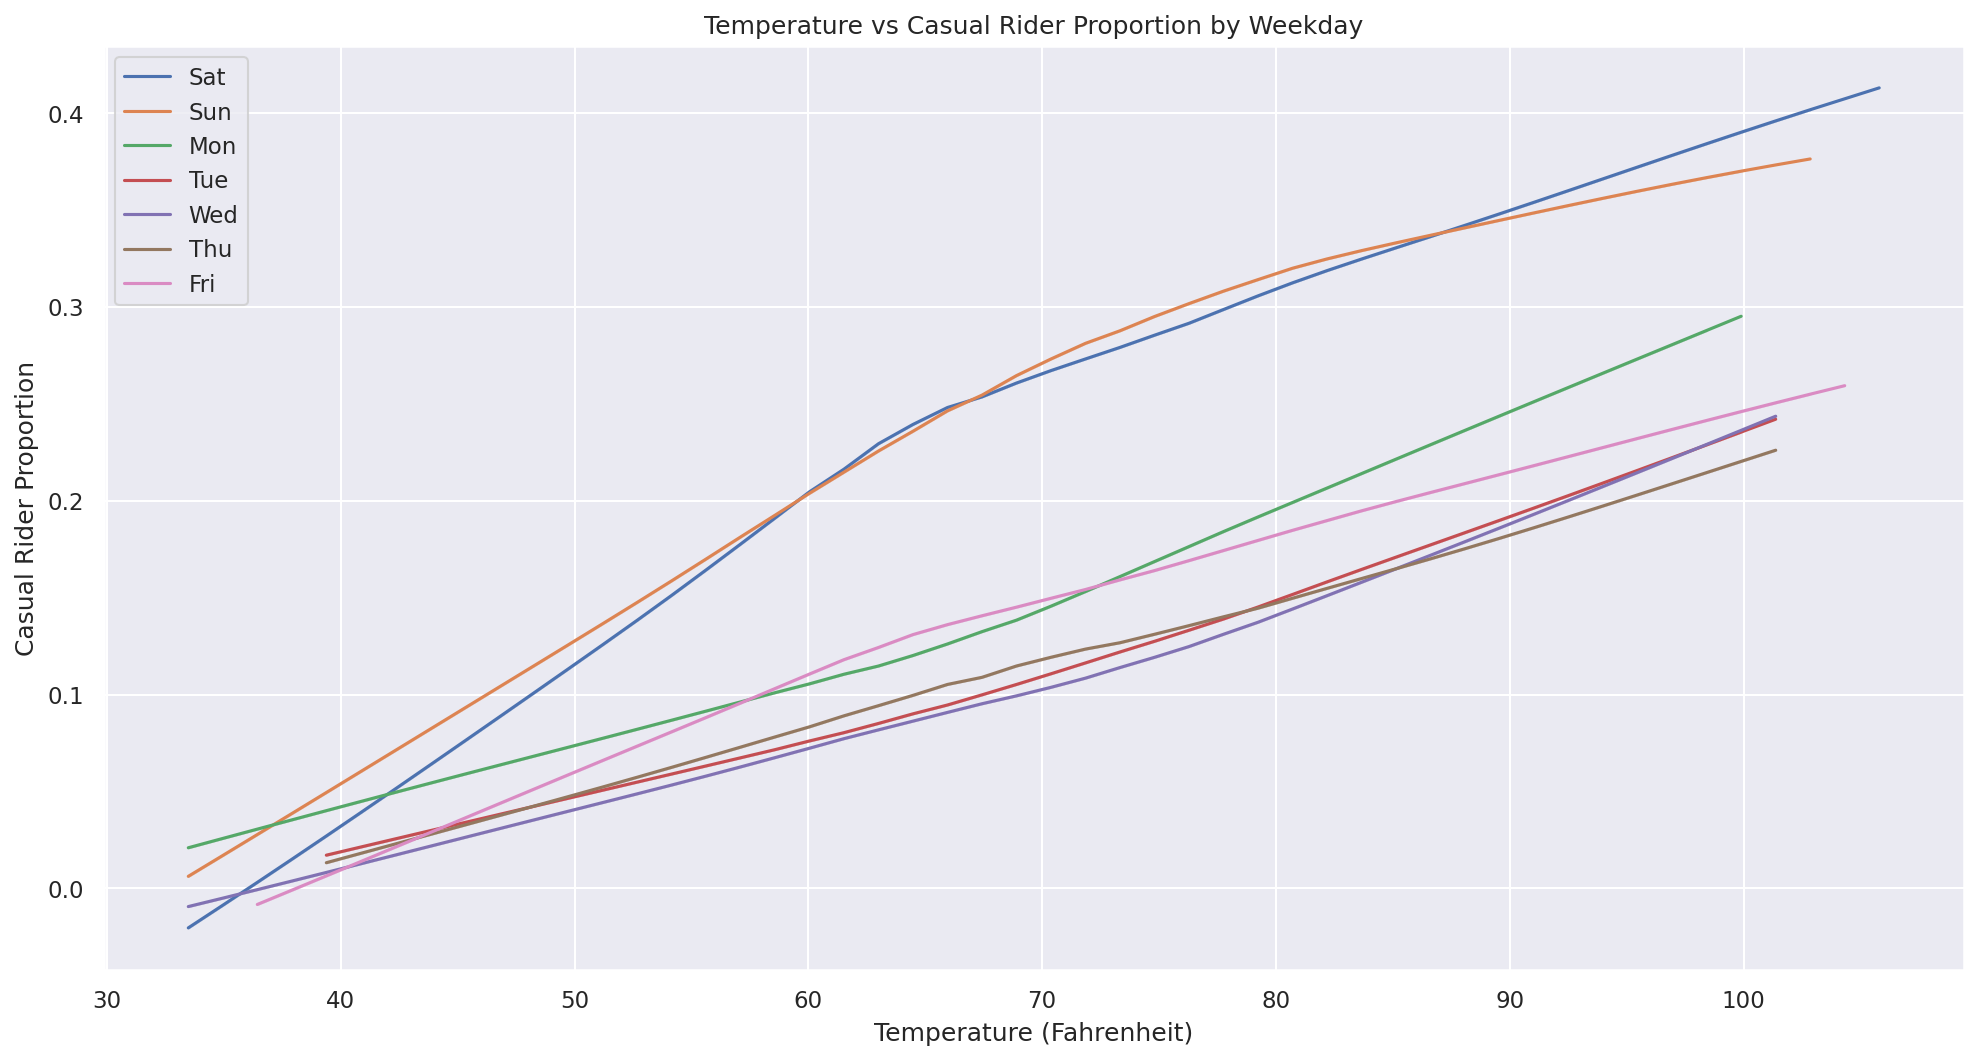

<Figure size 1500x1200 with 0 Axes>

In [31]:
from statsmodels.nonparametric.smoothers_lowess import lowess

df_6b = bike[['prop_casual', 'temp', 'weekday']]
df_6b['temp'] = df_6b['temp'] * 41 * (9/5) + 32

unique_days = bike['weekday'].unique()

for x in unique_days:
    x_day = df_6b[df_6b['weekday'] == x]
    ysmooth = lowess(x_day['prop_casual'], x_day['temp'], return_sorted=False)
    sns.lineplot(x_day['temp'], ysmooth, label= x)
    plt.legend()
    
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Casual Rider Proportion")
plt.title("Temperature vs Casual Rider Proportion by Weekday")
plt.figure(figsize=(10,8))

We can see that prop_casual increases as the temperature increases. So, casual biking is low when it's cold and higher when it's hot. This is most probable because during Summer people are more likely to do casual bike riding. Casual riding is also higher during Saturday and Sunday compared to weekdays.

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 7: Expanding our Analysis

<!-- BEGIN QUESTION -->

#### Question 1: Is the `bike` dataset helpful in assessing equity? Equity in transportation includes: improving the ability of people of different socio-economic classes, genders, races, and neighborhoods to access and afford the transportation services, and assessing how inclusive transportation systems are over time. 


_I don't think the bike dataset is helpful to assess equity as most of the variables are related to dates and weather and there are no variables related to gender, race, or neighborhoods. A variables that I'd introduce for the data to be useful in assessing equity is location as this would tell us the population that uses bikes the most and could lead us to identify the economic background and race of said population. I'd also add a gender variable (to assess the proportion of male vs female that use bikes, maybe females use bikes more since they can't afford to buy a car), and race (to assess what race is more likely to rent bikes and therefore create curated resources for them). I'd also keep the data fine grained by having each row be a user instead of grouping the data by the amount of users per hour as it currently appears in the bike dataframe. This way we could have more flexibility in how we group variables such as race, gender, and location._

<!-- END QUESTION -->



<!-- BEGIN QUESTION -->

#### Question 2: Would I recommend expanding bike sharing systems to more cities?

I'd recommend to expand bike sharing to additional cities because: 
1. People are using this transportation system for their daily commute. We can see this in the "Average Count of Casual vs Registered by Hour" graph from as the peak times that registered users use bikes is during the time of commuting to and from work. We also see in the graph "Comparison of Casual vs Registered Riders on Working and Non-working Days" that bike usage is higher during work days than non-working days for registered users, which supports the aforementioned argument. Expanding to other cities helps to alleviate traffic congestion and reduce carbon emissions, both of which provide a higher life quality for citizens.
2. Users who don't use bike sharing as their transportation method use bike sharing as a leisure activity. It can be seen in the graph "Temperature vs Casual Rider Proportion by Weekday" that casual riders have a higher usage during weekends. In the same graph we can see that the higher the weather temperature, the more casual bikers we have. Most people don't want to do outdoor activities when it's hot outside, so it is most probably that casual riders rent bikes is during summer when they have more free time to do outdoor activities.